In [1]:
import os
import torch
import torchvision
import matplotlib.pyplot as plt
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import matplotlib
from PIL import Image

/home/ffundel/Seminar/env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ffundel/Seminar/diffusers/src/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(


In [2]:
# https://huggingface.co/lllyasviel/control_v11p_sd15_seg

In [3]:
checkpoint = "lllyasviel/control_v11p_sd15_seg"
controlnet = ControlNetModel.from_pretrained(checkpoint, torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [4]:
imgs = {}
im_folder = 'semantic_maps'
for filename in os.listdir(im_folder):
    if filename == '.ipynb_checkpoints':
        continue
    f = os.path.join(im_folder, filename)
    index = filename[3:-4]
    img = Image.open(f)
    imgs[int(index)] = img

['bus', 'sky-other', 'tree', 'road']


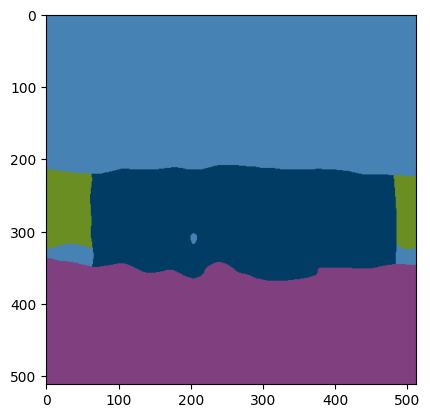

In [5]:
import json

with open('data.json') as f:
    data = json.load(f)

json_index = 0
rects, labels = data[json_index]
if '__image__' in labels:
    i = labels.index('__image__')
    del labels[i]
    del rects[i]
print(labels)

control_image = imgs[json_index]
plt.imshow(control_image)
plt.show()

In [6]:
prompt = "a photo of " + ', '.join(labels)
print(prompt)
generator = torch.manual_seed(0)

pipe.safety_checker = lambda images, clip_input: (images, False)
images = pipe(
    prompt,
    image=control_image,
    num_images_per_prompt=3,
    generator=generator,
    num_inference_steps=30,
).images

a photo of bus, sky-other, tree, road


100%|███████████████████████████████████████████| 30/30 [04:07<00:00,  8.26s/it]


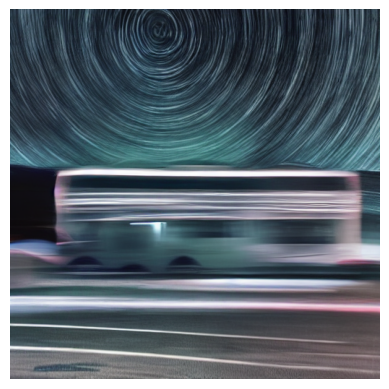

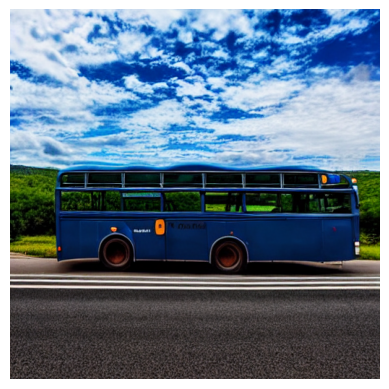

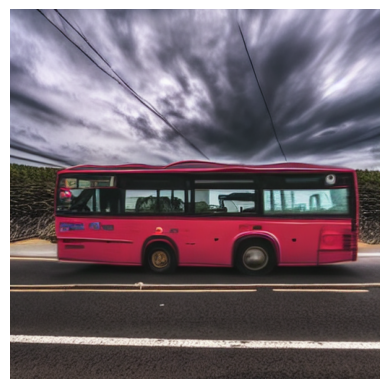

In [7]:
for i, img in enumerate(images):
    img_path = os.path.join('controlnet_images', 'img' + str(json_index) + '_' + str(i) + '.png')
    img.save(img_path)
    plt.axis('off')
    plt.imshow(img)
    plt.show()

['person', 'person', 'baseball bat', 'playingfield', 'person', 'tree', 'wall-other', 'cage']


100%|███████████████████████████████████████████| 30/30 [04:06<00:00,  8.22s/it]


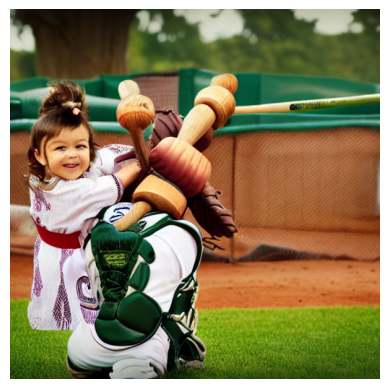

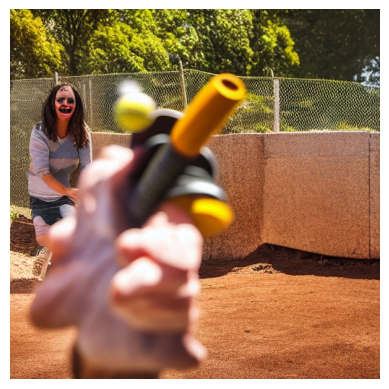

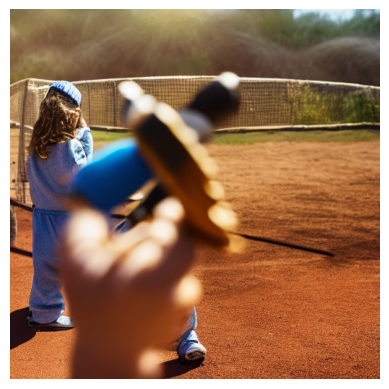

['gravel', 'railroad', 'train', 'sky-other', 'tree', 'dirt']


100%|███████████████████████████████████████████| 30/30 [04:06<00:00,  8.21s/it]


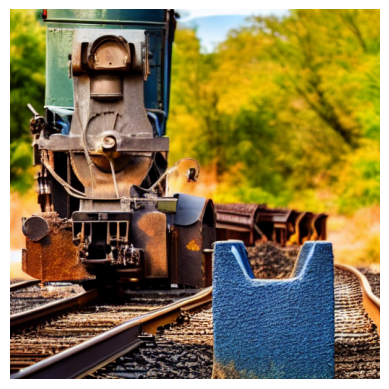

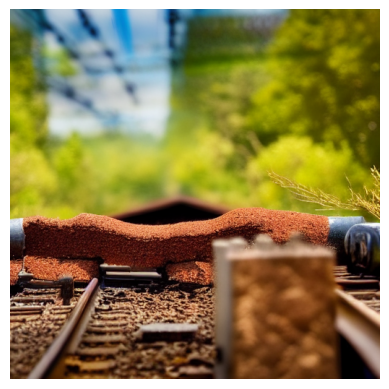

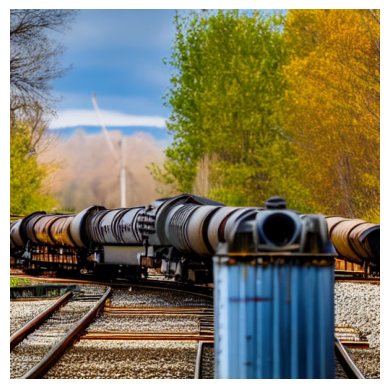

['boat', 'rock', 'mountain', 'sky-other', 'sea']


100%|███████████████████████████████████████████| 30/30 [04:05<00:00,  8.20s/it]


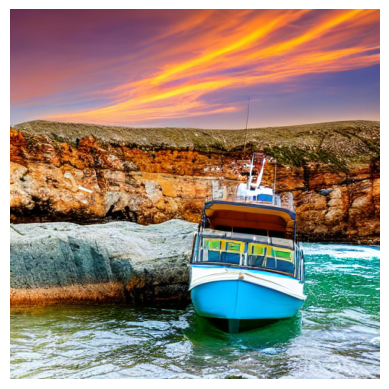

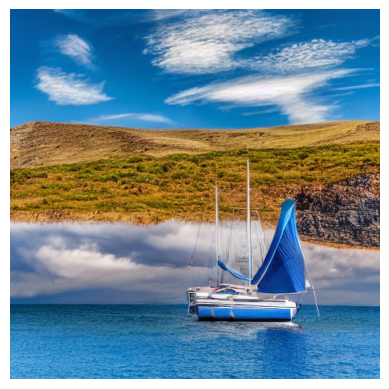

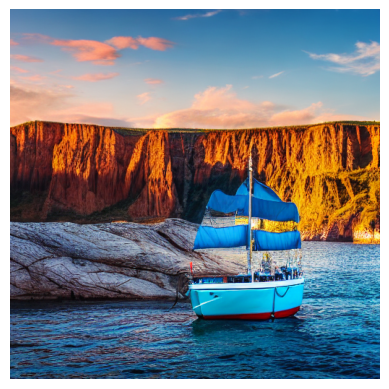

['skyscraper', 'sea', 'clouds', 'bridge', 'building-other', 'boat', 'boat']


100%|███████████████████████████████████████████| 30/30 [04:06<00:00,  8.21s/it]


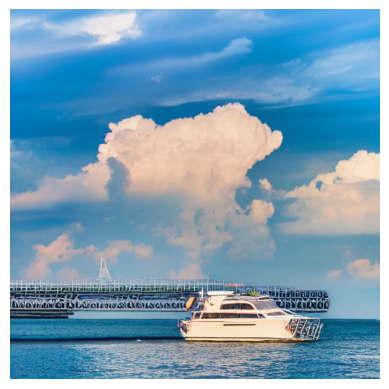

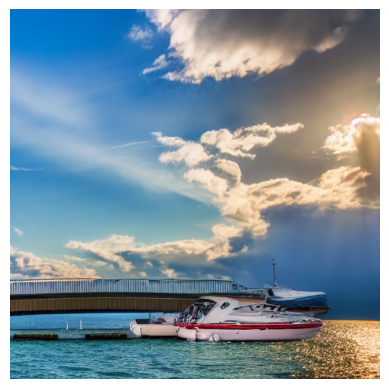

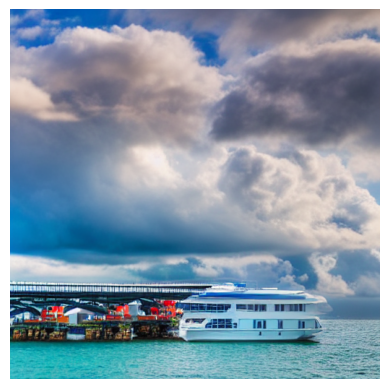

['horse', 'tree', 'horse', 'grass', 'horse', 'sky-other']


100%|███████████████████████████████████████████| 30/30 [04:06<00:00,  8.20s/it]


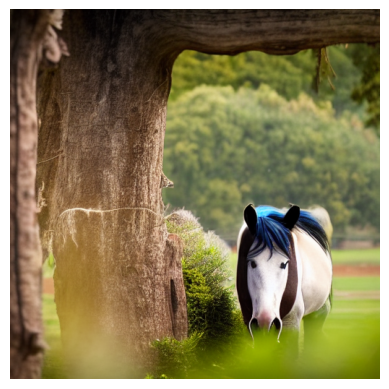

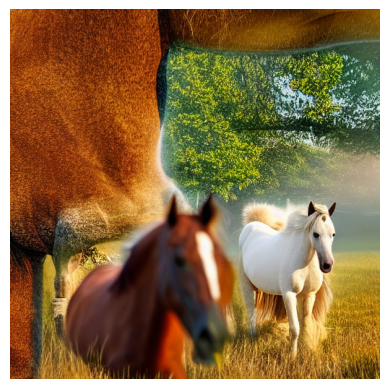

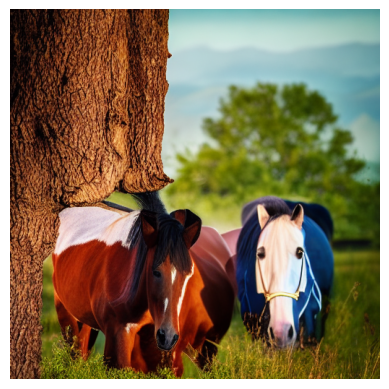

['car', 'building-other', 'tent', 'window-other', 'pavement', 'fog', 'road']


100%|███████████████████████████████████████████| 30/30 [04:05<00:00,  8.20s/it]


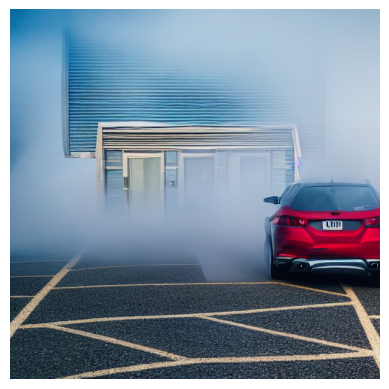

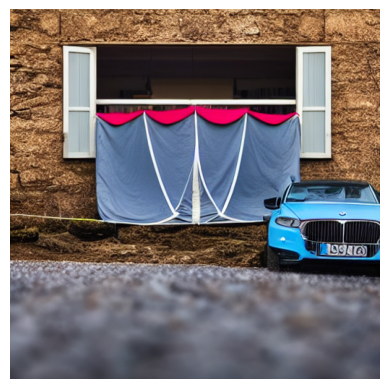

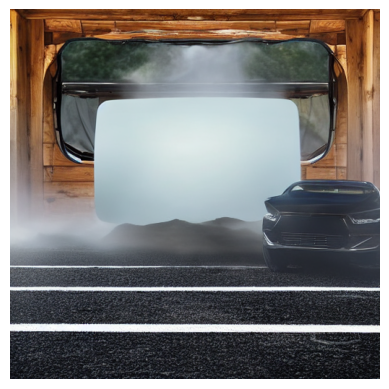

['elephant', 'grass', 'bush', 'tree']


 77%|████████████████████████████████▉          | 23/30 [03:09<00:57,  8.15s/it]

In [ ]:
####

with open('data.json') as f:
    data = json.load(f)

for json_index in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    rects, labels = data[json_index]
    if '__image__' in labels:
        i = labels.index('__image__')
        del labels[i]
        del rects[i]
    print(labels)
    
    control_image = imgs[json_index]
    
    prompt = "a photo of " + ', '.join(labels)
    images = pipe(
        prompt,
        image=control_image,
        negative_prompt="monochrome, lowres, bad anatomy, worst quality, low quality",
        num_images_per_prompt=3,
        generator=generator,
        num_inference_steps=30,
    ).images
    
    for i, img in enumerate(images):
        img_path = os.path.join('controlnet_images', 'img' + str(json_index) + '_' + str(i) + '.png')
        img.save(img_path)
        plt.axis('off')
        plt.imshow(img)
        plt.show()